# Codebug Alignment chart
The following is an overview of streamer alignments as curated by Ellie. The notebook allows you to generate your own alignment and view how you relate to them.

#### Install packages if needed

In [ ]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('pandas')
install('numpy')
install('seaborn')
install('plotly')
install('scipy')
install('matplotlib')
install('nbformat')
install('ipywidgets ')

#### Load relevant libraries and data to compare to

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Name': ["Bo", "Reya", "Ellie", "Shoomi", "Camilla", "Layna", "Toma", "Cerber", "Neuro", "Evil", "Bao", "Numi", "Mini", "Vedal"],
    'Size': ["huge", "huge", "little", "little", "huge", "little", "regular", "little", "huge", "huge", "little", "little", "huge", "little"],
    'Teasing': ["shit", "shit", "piss", "piss", "butt", "butt", "shit", "butt", "piss", "shit", "piss", "shit", "butt", "shit"],
    'Responsibility': ["boy", "man", "man", "boy", "boy", "man", "guy", "boy", "boy", "boy", "boy", "boy", "boy", "man"],
    'Type': ["streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer", "streamer"]
})

size_levels = ["little", "regular", "huge"]
teasing_levels = ["piss", "butt", "shit"]
responsibility_levels = ["boy", "guy", "man"]

data['Size'] = pd.Categorical(data['Size'], categories=size_levels, ordered=True)
data['Teasing'] = pd.Categorical(data['Teasing'], categories=teasing_levels, ordered=True)
data['Responsibility'] = pd.Categorical(data['Responsibility'], categories=responsibility_levels, ordered=True)

data['Size_num'] = data['Size'].cat.codes + 1
data['Teasing_num'] = data['Teasing'].cat.codes + 1
data['Responsibility_num'] = data['Responsibility'].cat.codes + 1

data['Size_num'] = data['Size'].cat.codes.astype(int)
data['Teasing_num'] = data['Teasing'].cat.codes.astype(int)
data['Responsibility_num'] = data['Responsibility'].cat.codes.astype(int)

#### Generate your own alignment

In [56]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML

# Function to create a new entry
def create_entry(name, size, teasing, responsibility, size_num, teasing_num, responsibility_num):
    new_entry = {
        'Name': name,
        'Size': size,
        'Teasing': teasing,
        'Responsibility': responsibility,
        'Size_num': size_num,
        'Teasing_num': teasing_num,
        'Responsibility_num': responsibility_num,
        'Type': "codebug"
    }
    return pd.DataFrame([new_entry])  

# Input widgets
name_input = widgets.Text(value='', description='Name:')

# Size Questions
size_explanation = widgets.HTML(value="<h3>Size</h3><b>Description:</b> Given the abstract context they are normally referenced in, are you a bottom (little) or top (huge)")
size_q1_explanation = widgets.HTML(value="1. Do you tackle challenges head-on or with calculated steps?")
size_q1 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

size_q2_explanation = widgets.HTML(value="2. In a social situation, do you typically prefer to stay in the background and observe instead of leading the conversation?")
size_q2 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

size_q3_explanation = widgets.HTML(value="3. If you were playing a strategy game, do you rush to take the lead with bold moves?")
size_q3 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

size_q4_explanation = widgets.HTML(value="4. Do you feel more comfortable in small, intimate settings or large, crowded environments?")
size_q4 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

size_q5_explanation = widgets.HTML(value="5. In a group setting, do you feel more comfortable taking on a leadership role over without standing out?")
size_q5 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

# Teasing Questions
teasing_explanation = widgets.HTML(value="<h3>Teasing</h3><b>Description:</b> When you tease your friends, are you cleverly drawing them into your silly trap (piss) or are you just shouting insults at them (shit)?")
teasing_q1_explanation = widgets.HTML(value="1. In a group, do you throw out bold, exaggerated comments that get everyone’s attention?")
teasing_q1 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

teasing_q2_explanation = widgets.HTML(value="2. Do you tease someone to make them feel more included and part of the group moreso than seeing their reactions?")
teasing_q2 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

teasing_q3_explanation = widgets.HTML(value="3. When you tease, is it a way for you to bond with someone, testing the waters of your friendship?")
teasing_q3 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

teasing_q4_explanation = widgets.HTML(value="4. Do you prefer elaborate setups and playful tricks over a direct approach in your teasing?")
teasing_q4 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

teasing_q5_explanation = widgets.HTML(value="5. Do you find amusement in pushing someone's buttons?")
teasing_q5 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

# Responsibility Questions
responsibility_explanation = widgets.HTML(value="<h3>Responsibility</h3><b>Description:</b> How much responsibility do you take in a situation? A man makes plans and to-do lists. A man remembers his friend their birthdays. A boy has cups all over his desk and still needs to be reminded to drink water.<br>These are impulses, not successes. A man can still be a mess and fail to drink water But she has a system.")
responsibility_q1_explanation = widgets.HTML(value="1. Do you tend to make impulsive decisions without fully thinking them through?")
responsibility_q1 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

responsibility_q2_explanation = widgets.HTML(value="2. Do you often set long-term goals for yourself and stick to a plan to achieve them?")
responsibility_q2 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

responsibility_q3_explanation = widgets.HTML(value="3. When handling commitments, do you make a point to be reliable and on time?")
responsibility_q3 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

responsibility_q4_explanation = widgets.HTML(value="4. Do you have a clear system of managing your tasks and remembering commitments, therefore needing no help to stay on track?")
responsibility_q4 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

responsibility_q5_explanation = widgets.HTML(value="5. Do you find yourself procrastinating and avoiding important tasks?")
responsibility_q5 = widgets.Dropdown(options=['disagree', 'agree', 'strongly agree'], value='disagree')

submit_button = widgets.Button(description="Submit Entry")
output = widgets.Output()

# Function to calculate score for each question
def calculate_score(answer:str, inverse: bool = 0):
    if inverse == 1:
        return {'disagree': 2, 'agree': 1, 'strongly agree': 0}.get(answer, 0)
    
    else:
        return {'disagree': 0, 'agree': 1, 'strongly agree': 2}.get(answer, 0)

# Functions to calculate overall scores for each trait
def get_size_score():
    return sum([calculate_score(size_q1.value), calculate_score(size_q2.value, 1), calculate_score(size_q3.value),
                calculate_score(size_q4.value, 1), calculate_score(size_q5.value)])/5

def get_teasing_score():
    return sum([calculate_score(teasing_q1.value), calculate_score(teasing_q2.value, 1), calculate_score(teasing_q3.value),
                calculate_score(teasing_q4.value, 1), calculate_score(teasing_q5.value)])/5

def get_responsibility_score():
    return sum([calculate_score(responsibility_q1.value,1), calculate_score(responsibility_q2.value), calculate_score(responsibility_q3.value),
                calculate_score(responsibility_q4.value), calculate_score(responsibility_q5.value,1)])/5

# Button click handler
def on_button_click(b):
    global data

    # Calculate scores for each trait
    size_score = get_size_score()
    teasing_score = get_teasing_score()
    responsibility_score = get_responsibility_score()
    size_type = size_levels[round(size_score)]
    teasing_type = teasing_levels[round(teasing_score)]
    responsibility_type = responsibility_levels[round(responsibility_score)]

    # Create new entry with scores
    new_entry = create_entry(
        name_input.value,
        size_type,
        teasing_type,
        responsibility_type,
        size_score,
        teasing_score,
        responsibility_score,
    )
    
    # Correctly reference the global 'dataset' variable
    data = pd.concat([data, new_entry], ignore_index=True)
    
    with output:
        print(f"Saved entry for {name_input.value}")
        print(f"Size Score: {size_type} ({size_score}), Teasing Score: {teasing_type} ({teasing_score}), Responsibility Score: {responsibility_type} ({responsibility_score})")

# Attach the button click handler
submit_button.on_click(on_button_click)

# Display all input fields and the submit button
display(name_input,
        size_explanation, size_q1_explanation, size_q1, size_q2_explanation, size_q2, size_q3_explanation, size_q3, 
        size_q4_explanation, size_q4, size_q5_explanation, size_q5,
        teasing_explanation, teasing_q1_explanation, teasing_q1, teasing_q2_explanation, teasing_q2, teasing_q3_explanation, teasing_q3,
        teasing_q4_explanation, teasing_q4, teasing_q5_explanation, teasing_q5,
        responsibility_explanation, responsibility_q1_explanation, responsibility_q1, responsibility_q2_explanation, responsibility_q2,
        responsibility_q3_explanation, responsibility_q3, responsibility_q4_explanation, responsibility_q4,
        responsibility_q5_explanation, responsibility_q5,
        submit_button, output)


Text(value='', description='Name:')

HTML(value='<h3>Size</h3><b>Description:</b> Given the abstract context they are normally referenced in, are y…

HTML(value='1. Do you tackle challenges head-on or with calculated steps?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='2. In a social situation, do you typically prefer to stay in the background and observe instead of…

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='3. If you were playing a strategy game, do you rush to take the lead with bold moves?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='4. Do you feel more comfortable in small, intimate settings or large, crowded environments?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='5. In a group setting, do you feel more comfortable taking on a leadership role over without stand…

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='<h3>Teasing</h3><b>Description:</b> When you tease your friends, are you cleverly drawing them int…

HTML(value='1. In a group, do you throw out bold, exaggerated comments that get everyone’s attention?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='2. Do you tease someone to make them feel more included and part of the group moreso than seeing t…

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='3. When you tease, is it a way for you to bond with someone, testing the waters of your friendship…

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='4. Do you prefer elaborate setups and playful tricks over a direct approach in your teasing?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value="5. Do you find amusement in pushing someone's buttons?")

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='<h3>Responsibility</h3><b>Description:</b> How much responsibility do you take in a situation? A m…

HTML(value='1. Do you tend to make impulsive decisions without fully thinking them through?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='2. Do you often set long-term goals for yourself and stick to a plan to achieve them?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='3. When handling commitments, do you make a point to be reliable and on time?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='4. Do you have a clear system of managing your tasks and remembering commitments, therefore needin…

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

HTML(value='5. Do you find yourself procrastinating and avoiding important tasks?')

Dropdown(options=('disagree', 'agree', 'strongly agree'), value='disagree')

Button(description='Submit Entry', style=ButtonStyle())

Output()

##### Generate heatmap

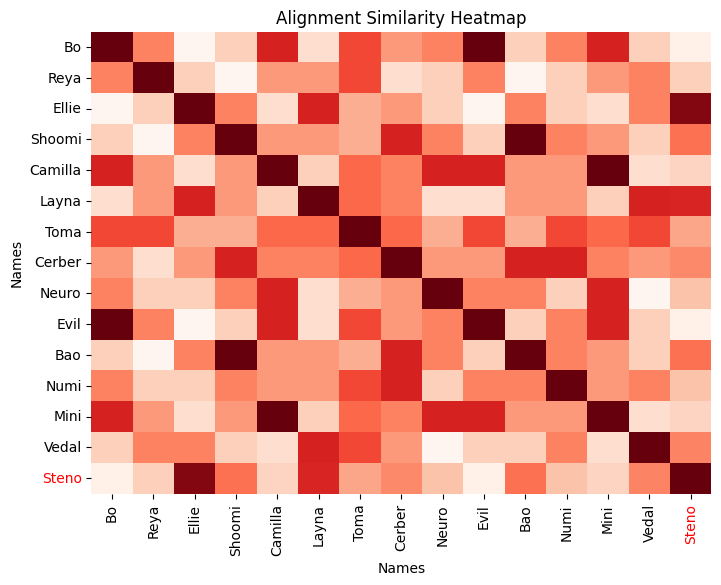

In [26]:
dissimilarity_matrix = pdist(data[['Size_num', 'Teasing_num', 'Responsibility_num']], metric='euclidean')
similarity_matrix = 1 - squareform(dissimilarity_matrix)

similarity_df = pd.DataFrame(similarity_matrix, index=data['Name'], columns=data['Name'])

label_colors = ['red' if t == 'codebug' else 'black' for t in data['Type']]

plt.figure(figsize=(8, 6))

sns.heatmap(similarity_df, cmap='Reds', annot=False, cbar=False, 
            xticklabels=similarity_df.columns, yticklabels=similarity_df.index)

plt.title("Alignment Similarity Heatmap")
plt.xlabel("Names")
plt.ylabel("Names")
plt.xticks(rotation=90)

ax = plt.gca()
for label, color in zip(ax.get_xticklabels(), label_colors):
    label.set_color(color)
for label, color in zip(ax.get_yticklabels(), label_colors):
    label.set_color(color)

plt.show()




#### Generate the 3D plot

In [47]:
np.random.seed(123)
data['offset_x'] = np.random.normal(0, 0.1, size=len(data))
data['offset_y'] = np.random.normal(0, 0.1, size=len(data))
data['offset_z'] = np.random.normal(0, 0.1, size=len(data))

data['rgb'] = data.apply(lambda row: f'rgb({int(row["Size_num"])*50}, {int(row["Teasing_num"])*50}, {int(row["Responsibility_num"])*50})', axis=1)

fig = go.Figure(data=[go.Scatter3d(
    x=data['Size_num'] + data['offset_x'],
    y=data['Teasing_num'] + data['offset_y'],
    z=data['Responsibility_num'] + data['offset_z'],
    mode='markers+text',
    text=data['Name'],
    textposition='top center',
    marker=dict(size=5, color= data['rgb']) 
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="Size", tickvals=[0, 1, 2], ticktext=size_levels, range=[-0.5, 2.5]),
        yaxis=dict(title="Teasing", tickvals=[0, 1, 2], ticktext=teasing_levels, range=[-0.5, 2.5]),
        zaxis=dict(title="Responsibility", tickvals=[0, 1, 2], ticktext=responsibility_levels, range=[-0.5, 2.5])
    ),
    title="3D Scatter Plot"
)

fig.show()

#### Top 5 similar streamers to you

In [48]:
codebug_data = data[data['Type'] == 'codebug']
streamer_data = data[data['Type'] == 'streamer']

codebug_name = codebug_data['Name'].iloc[0]

streamer_similarities = similarity_df[codebug_name][streamer_data['Name']]

top_5_similar_streamers = streamer_similarities.sort_values(ascending=False).head(5)

print("Top 5 most similar 'streamer' entries compared to you:")
print(top_5_similar_streamers)

Top 5 most similar 'streamer' entries compared to you:
Name
Ellie     0.800000
Layna    -0.019804
Shoomi   -0.800000
Bao      -0.800000
Vedal    -1.009975
Name: Steno, dtype: float64


#### Using K-means clustering we can try to identify some groups and view them in 2D.

determined number of clusters: 3
QhullError: Could not compute Convex Hull for cluster 0 (possibly degenerate or collinear points).


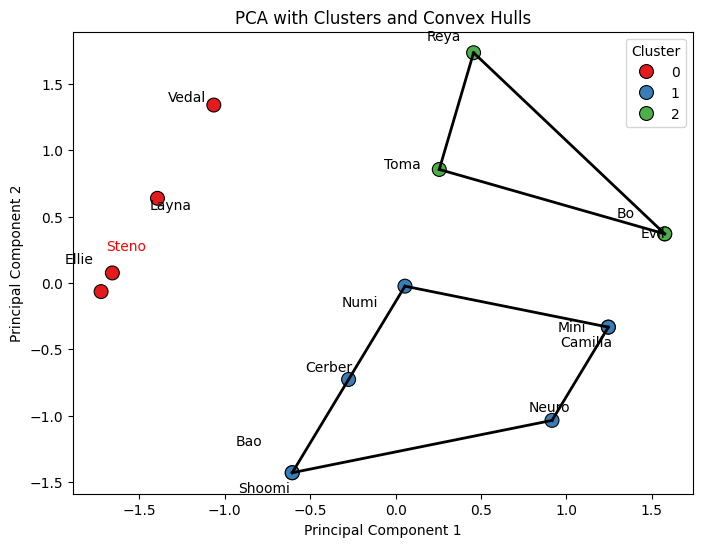

Observed statistic: -1.0708146072677744
Permutation test p-value: 0.0
The clusters differ based on the dissimilarity matrix.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull, QhullError
import seaborn as sns
from sklearn.metrics import pairwise_distances

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(data[['Size_num', 'Teasing_num', 'Responsibility_num']])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_coords)
    inertia.append(kmeans.inertia_)

diffs = np.diff(inertia)

for i in range(2, len(diffs)):
    if diffs[i] < (diffs[i-1] / 2):
        optimal_k = i + 1
        print(f"determined number of clusters: {optimal_k}")
        break

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(pca_coords)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=pca_coords[:, 0], y=pca_coords[:, 1], hue=data['Cluster'], palette='Set1', s=100, edgecolor='black')

for cluster in np.unique(data['Cluster']):
    cluster_points = pca_coords[data['Cluster'] == cluster]
    
    if len(cluster_points) >= 4:
        try:
            hull = ConvexHull(cluster_points)
            for simplex in hull.simplices:
                plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-', lw=2)
        except QhullError:
            print(f"QhullError: Could not compute Convex Hull for cluster {cluster} (possibly degenerate or collinear points).")
            continue

plt.title('PCA with Clusters and Convex Hulls')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')

for i in range(data.shape[0]):
    x_offset = np.random.uniform(-0.2, 0.2)
    y_offset = np.random.uniform(-0.2, 0.2)
    color = 'red' if data["Type"][i] == "codebug" else 'black'
    plt.text(pca_coords[i, 0] + x_offset, pca_coords[i, 1] + y_offset, data["Name"][i],
             fontsize=10, ha='right', va='bottom', color=color)

plt.show()

dissimilarity_matrix = pairwise_distances(pca_coords, metric='euclidean')

def observed_statistic(dissimilarity_matrix, labels):
    intra_cluster_dissimilarities = []
    inter_cluster_dissimilarities = []

    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            dist = dissimilarity_matrix[i, j]
            if labels[i] == labels[j]:
                intra_cluster_dissimilarities.append(dist)
            else:
                inter_cluster_dissimilarities.append(dist)

    observed_stat = np.mean(intra_cluster_dissimilarities) - np.mean(inter_cluster_dissimilarities)
    return observed_stat

def permutation_test_stat(dissimilarity_matrix, labels, n_permutations=1000):
    observed_stat = observed_statistic(dissimilarity_matrix, labels)
    permuted_stats = []

    for _ in range(n_permutations):
        permuted_labels = np.random.permutation(labels)
        permuted_stat = observed_statistic(dissimilarity_matrix, permuted_labels)
        permuted_stats.append(permuted_stat)

    permuted_stats = np.array(permuted_stats)
    p_value = np.mean(np.abs(permuted_stats) >= np.abs(observed_stat))
    return observed_stat, p_value

observed_stat, p_value = permutation_test_stat(dissimilarity_matrix, data['Cluster'], n_permutations=1000)

print(f'Observed statistic: {observed_stat}')
print(f'Permutation test p-value: {p_value}')

if p_value < 0.05:
    print("The clusters differ based on the dissimilarity matrix.")
else:
    print("The clusters do not differ based on the dissimilarity matrix.")


#### Hierarchical dendrogram

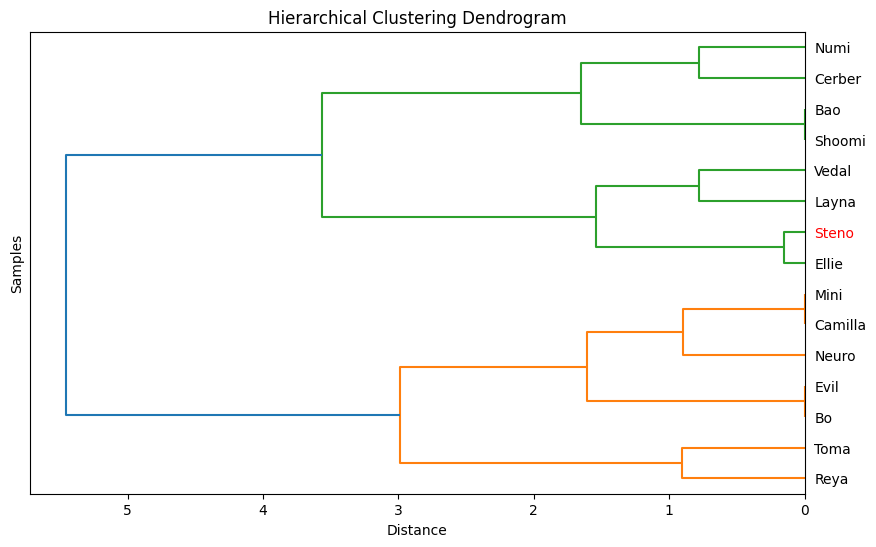

In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(pca_coords, method='ward')
hierarchical_clusters = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

data['Hierarchical_Cluster'] = hierarchical_clusters

plt.figure(figsize=(10, 6))
dendro = dendrogram(linkage_matrix, labels=data['Name'].values, orientation='left', leaf_font_size=10)

ax = plt.gca()
for label in ax.get_yticklabels():
    name = label.get_text()
    if data.loc[data['Name'] == name, 'Type'].values[0] == "codebug":
        label.set_color('red')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Samples')
plt.show()


#### Find frequently co occurring traits

In [52]:
import pandas as pd
from scipy.stats import pearsonr

size_labels = {1: 'little', 2: 'regular', 3: 'huge'}
teasing_labels = {1: 'piss', 2: 'butt', 3: 'shit'}
responsibility_labels = {1: 'boy', 2: 'guy', 3: 'man'}

size = data['Size_num'].map(size_labels)
teasing = data['Teasing_num'].map(teasing_labels)
responsibility = data['Responsibility_num'].map(responsibility_labels)

correlations = {
    "Size vs Teasing": pearsonr(data['Size_num'], data['Teasing_num']),
    "Size vs Responsibility": pearsonr(data['Size_num'], data['Responsibility_num']),
    "Teasing vs Responsibility": pearsonr(data['Teasing_num'], data['Responsibility_num'])
}

for pair, corr in correlations.items():
    if corr[1] < 0.05:  # Checking if the p-value is significant
        significance = "significant"
    else:
        significance = "not significant"

    if pair == "Size vs Teasing":
        if corr[0] < 0:
            print(f"More teasing is correlated to a smaller size (correlation coefficient = {corr[0]:.2f}, p-value = {corr[1]:.3f}), which is {significance}.")
        else:
            print(f"More teasing is correlated to a larger size (correlation coefficient = {corr[0]:.2f}, p-value = {corr[1]:.3f}), which is {significance}.")
    elif pair == "Size vs Responsibility":
        if corr[0] < 0:
            print(f"Higher responsibility is correlated to a smaller size (correlation coefficient = {corr[0]:.2f}, p-value = {corr[1]:.3f}), which is {significance}.")
        else:
            print(f"Higher responsibility is correlated to a larger size (correlation coefficient = {corr[0]:.2f}, p-value = {corr[1]:.3f}), which is {significance}.")
    elif pair == "Teasing vs Responsibility":
        if corr[0] < 0:
            print(f"Higher responsibility is correlated to less teasing (correlation coefficient = {corr[0]:.2f}, p-value = {corr[1]:.3f}), which is {significance}.")
        else:
            print(f"Higher responsibility is correlated to more teasing (correlation coefficient = {corr[0]:.2f}, p-value = {corr[1]:.3f}), which is {significance}.")

contingency_size_teasing = pd.crosstab(size, teasing)
contingency_size_responsibility = pd.crosstab(size, responsibility)
contingency_teasing_responsibility = pd.crosstab(teasing, responsibility)

# Find the combination of values (instead of just max count)
size_teasing_combination = contingency_size_teasing.stack().idxmax()
size_responsibility_combination = contingency_size_responsibility.stack().idxmax()
teasing_responsibility_combination = contingency_teasing_responsibility.stack().idxmax()

print("\nMost common co-occurrences:")
print(f"Size vs Teasing: {size_teasing_combination}")
print(f"Size vs Responsibility: {size_responsibility_combination}")
print(f"Teasing vs Responsibility: {teasing_responsibility_combination}")

More teasing is correlated to a larger size (correlation coefficient = 0.33, p-value = 0.231), which is not significant.
Higher responsibility is correlated to a smaller size (correlation coefficient = -0.34, p-value = 0.215), which is not significant.
Higher responsibility is correlated to more teasing (correlation coefficient = 0.04, p-value = 0.875), which is not significant.

Most common co-occurrences:
Size vs Teasing: ('regular', 'butt')
Size vs Responsibility: ('little', 'boy')
Teasing vs Responsibility: ('butt', 'guy')
